## basic analysis of mag-comp bauer model

* ....
* model comparison

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os
import arviz as az

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
target_folder = op.join(bids_folder, f'derivatives/cogmodels_magjudge')

sns.set_context('talk')


In [5]:
from utils import get_data

df = get_data(bids_folder)

number of subjects found: 64


## Model Comparison

In [3]:
target_folder = op.join(bids_folder, f'derivatives/cogmodels_magjudge')

model_1 =  az.from_netcdf(op.join(target_folder, f'model-1_trace.netcdf'))
model_2 =  az.from_netcdf(op.join(target_folder, f'model-2_trace.netcdf'))
model_3 =  az.from_netcdf(op.join(target_folder, f'model-3_trace.netcdf'))
model_4 =  az.from_netcdf(op.join(target_folder, f'model-4_trace.netcdf'))
model_5 =  az.from_netcdf(op.join(target_folder, f'model-5_trace.netcdf'))


In [4]:
compare_dict = {"model 1": model_1, "model 2": model_2,"model 3": model_3, "model 4": model_4}
compare_dict = {"n1/n2, no fit prior": model_1, "n1/n2, fit prior": model_2,
                "per/mem noise, no fit prior": model_3, "per/mem noise, fit prior": model_4, 
                 "per/mem noise, fit prior, only prior_sd group reg": model_5}

az.compare(compare_dict)

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/mrenke/mambaforge/envs/

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
"per/mem noise, fit prior, only prior_sd group reg",0,-3729.604808,131.117813,0.000000,7.319256e-01,63.769682,0.000000,True,log
"per/mem noise, fit prior",1,-3730.087301,131.803883,0.482493,0.000000e+00,63.797268,0.813595,True,log
"n1/n2, fit prior",2,-3733.050611,134.136775,3.445803,2.244487e-01,63.652330,3.938976,True,log
"n1/n2, no fit prior",3,-3797.628828,89.875935,68.024020,4.362577e-02,63.361328,12.139295,True,log
"per/mem noise, no fit prior",4,-3804.242526,75.191898,74.637718,7.793766e-14,63.557526,12.000286,True,log


### 

### Get subwise estimates



In [6]:
from utils_02 import get_subwise_params

idata =  az.from_netcdf(op.join(target_folder, f'model-5_trace.netcdf'))

sd_mem = get_subwise_params(idata, 'memory_noise_sd')
sd_per = get_subwise_params(idata, 'perceptual_noise_sd')


In [13]:
from bauer.utils.bayes import softplus

df_params = sd_mem.join(sd_per, on='subject')

for col in df_params.columns:
    df_params[col] = softplus(df_params[col])
df_params.head()

,memory_noise_sd,perceptual_noise_sd
subject,,
1,0.142121,0.061360
2,0.149180,0.124042
3,0.151162,0.165790
4,0.138716,0.052851
5,0.147155,0.115497


In [12]:
df_params

,memory_noise_sd,perceptual_noise_sd
subject,,
1,0.142121,0.061360
2,0.149180,0.124042
3,0.151162,0.165790
4,0.138716,0.052851
5,0.147155,0.115497
...,...,...
60,0.137687,0.037885
61,0.148456,0.083093
62,0.136425,0.040149


### ppcs

In [15]:
ppc = model.ppc(paradigm=df, idata=idata, )

Sampling: [ll_bernoulli]


/Users/mrenke/git/bauer/bauer/utils/bayes.py:38: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


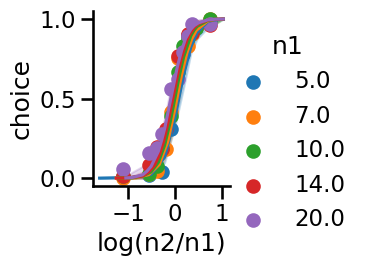

In [20]:
from bauer.utils.plotting import plot_ppc

plot_ppc(df, ppc, level='group', plot_type=1, var_name='ll_bernoulli')

In [32]:
model.free_parameters

{'n1_evidence_sd': {'mu_intercept': -1.0, 'transform': 'softplus'},
 'n2_evidence_sd': {'mu_intercept': -1.0, 'transform': 'softplus'}}

In [23]:
variable_names = list(idata.posterior.data_vars.keys())
variable_names

['n1_evidence_sd_mu',
 'n1_evidence_sd_offset',
 'n2_evidence_sd_mu',
 'n2_evidence_sd_offset',
 'n1_evidence_sd_sd',
 'n2_evidence_sd_sd',
 'n1_evidence_sd',
 'n2_evidence_sd']

In [31]:
n1 = softplus(idata['posterior']['n1_evidence_sd_mu']).to_dataframe().reset_index('n1_evidence_sd_regressors').rename(mapper={'n1_evidence_sd_regressors':'regressor'}, axis=1)
n1.head()

regressor  n1_evidence_sd_mu
chain draw                              
0     0     Intercept           0.227168
      0         group           0.864315
      1     Intercept           0.223017
      1         group           0.746213
      2     Intercept           0.236774

In [ ]:
# add log likelihoods to the model
import arviz as az
from utils_02 import build_model

model_label = '4'
model = build_model(model_label, df)
model.build_estimation_model()

idata = az.from_netcdf(op.join(bids_folder, f'derivatives/cogmodels_magjudge/model-{model_label}_trace.netcdf'))


In [ ]:
import pymc as pm

model.build_estimation_model(df, hierarchical=True)
with model.estimation_model:
    pm.compute_log_likelihood(idata)

az.to_netcdf(idata,op.join(target_folder, f'model-{model_label}_trace-ll.netcdf'))